# MNIST DATA SET- CNN 

# (activation=relu,activation=softmax,opt=adam/rmsprop)

In [1]:
#import the dataset

In [2]:
from keras.datasets import mnist

In [3]:
#load the data

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
#check the shape of dataset

In [6]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
#visualize the data

In [8]:
import matplotlib.pyplot as plt

In [9]:
single_img = x_train[0]

In [10]:
#single_img

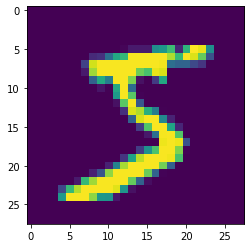

In [11]:
plt.imshow(single_img)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
#transform the y data to categorical

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
y_train_cat = to_categorical(y_train,10)

In [17]:
y_test_cat = to_categorical(y_test,10)

In [18]:
x_train.min(),x_train.max()

(0, 255)

In [19]:
#scaled data

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
#x_train.min(),x_train.max()

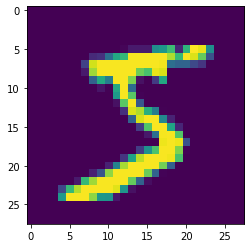

In [22]:
plt.imshow(x_train[0])

In [23]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
#reshaping the data

In [25]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [26]:
#training the model

In [27]:
from keras.models import Sequential

In [28]:
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten

In [29]:
#using relu

In [30]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x_train,y_train_cat,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2815 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0497 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0332 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0251 - accuracy: 0.9928: 4 - ETA: 41s - loss: 0.0216 - accuracy:  - ETA: 41s - loss: 0.0217 - acc - ETA: 40s - loss: 0.0219 - acc - ETA: 0s - loss: 0.0251 - ac
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0207 - accuracy: 0.9937 ETA: 2s - loss: 0
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0158 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0131 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0116 - accuracy: 0.99680s - loss: 0.01

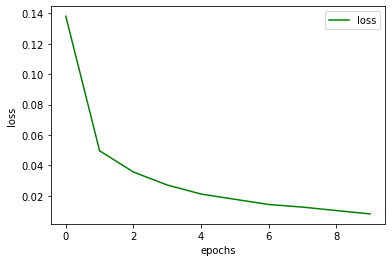

In [33]:
train_loss = history.history['loss']
epochs = range(0,10)
plt.plot(epochs,train_loss,'g',label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

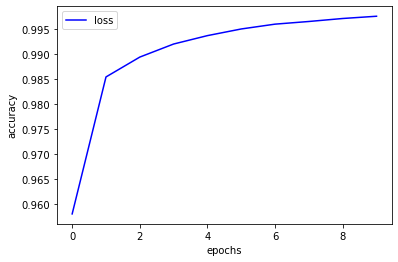

In [36]:
train_accuracy = history.history['accuracy']
epochs = range(0,10)
plt.plot(epochs,train_accuracy,'b',label='loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
#evaluation

In [39]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 4s 10ms/step - loss: 0.0649 - accuracy: 0.9863


[0.06490888446569443, 0.986299991607666]

In [40]:
pred  = model.predict_classes(x_test)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
pred[0]

7

In [42]:
y_test[0]

7

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
#using adam

In [46]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x_train,y_train_cat,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2750 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0497 - accuracy: 0.98403s - los
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0254 - accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0176 - accuracy: 0.99451s - loss: 0.0176 - accu - ETA: 0s - loss: 0.0176  - ETA: 0s - loss: 0.0176 - ac
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0053 - accuracy: 0.99820s - loss: 0.0053 
Epoch 9/10
1875/1875 [==============================] - 49s 26

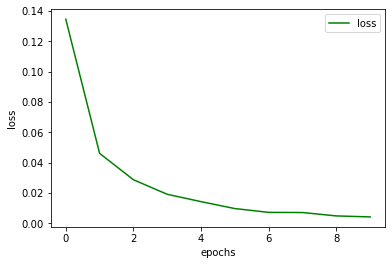

In [49]:
train_loss_adam = history.history['loss']
epochs = range(0,10)
plt.plot(epochs,train_loss_adam,'g',label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

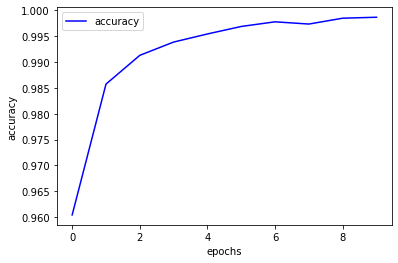

In [50]:
train_accuracy_adam = history.history['accuracy']
epochs = range(0,10)
plt.plot(epochs,train_accuracy_adam,'b',label='accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 3s 9ms/step - loss: 0.0612 - accuracy: 0.9861


[0.06116583198308945, 0.9861000180244446]

In [53]:
pred_adam = model.predict_classes(x_test)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
pred_adam[5]

1

In [55]:
y_test[5]

1

In [56]:
print(classification_report(y_test,pred_adam))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.96      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
#epochs=3

In [58]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [59]:
history_epoch_3 = model.fit(x_train,y_train_cat,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2793 - accuracy: 0.9132
Epoch 2/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0482 - accuracy: 0.9853
Epoch 3/3
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0306 - accuracy: 0.9907


In [60]:
history_epoch_3.history['loss']

[0.13670580089092255, 0.04724003002047539, 0.034127578139305115]

In [68]:
pred_rms_epoch3 = model.predict_classes(x_test)

In [69]:
print(classification_report(y_test,pred_rms_epoch3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



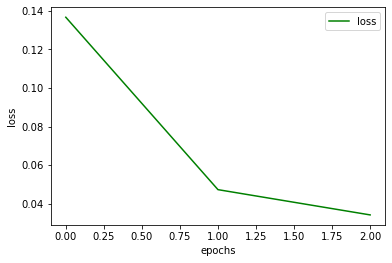

In [61]:
train_loss_rms = history_epoch_3.history['loss']
epochs = range(0,3)
plt.plot(epochs,train_loss_rms,'g',label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

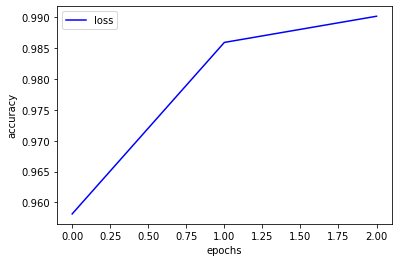

In [62]:
train_accuracy_rms = history_epoch_3.history['accuracy']
epochs = range(0,3)
plt.plot(epochs,train_accuracy_rms,'b',label='loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [63]:
#epoch 3 , optimizer=adam

In [64]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [65]:
history_3_adam = model.fit(x_train,y_train_cat,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 51s 26ms/step - loss: 0.2977 - accuracy: 0.91260s - los
Epoch 2/3
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0521 - accuracy: 0.9842
Epoch 3/3
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0314 - accuracy: 0.9904


In [70]:
pred_adam_epoch3 = model.predict_classes(x_test)

In [71]:
print(classification_report(y_test,pred_adam_epoch3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



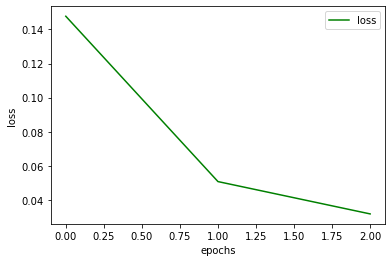

In [66]:
train_loss_adam_3 = history_3_adam.history['loss']
epochs = range(0,3)
plt.plot(epochs,train_loss_adam_3,'g',label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

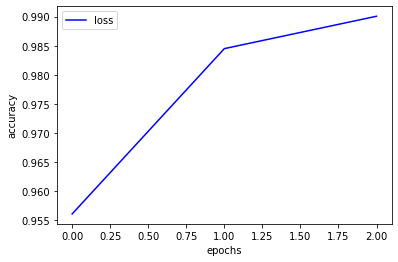

In [67]:
train_accuracy_adam_3 = history_3_adam.history['accuracy']
epochs = range(0,3)
plt.plot(epochs,train_accuracy_adam_3,'b',label='loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()